Nivell 1

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seab
import numpy as np
import mysql.connector
from mysql.connector import Error

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='sprint4',
    auth_plugin='mysql_native_password'
)

cursor = conn.cursor()

- Exercici 1 - Una variable numèrica.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_12108\3469062598.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Text(0, 0.5, 'Cantidad')

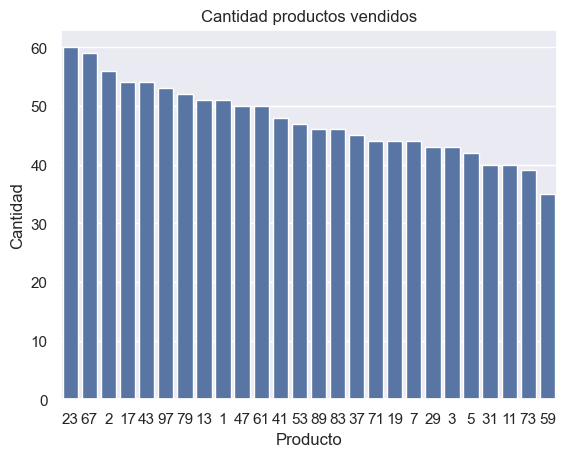

In [32]:
query="""
SELECT * FROM transactions_products 
JOIN transaction on id = transaction_id 
WHERE declined=0
"""
seab.set_theme()
df = pd.read_sql(query, conn)
seab.countplot(data=df, x='product_id',order=df["product_id"].value_counts().index) 
plt.title("Cantidad productos vendidos")
plt.xlabel('Producto')
plt.ylabel("Cantidad")

- Exercici 2 - Dues variables numèriques.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_12108\1664443739.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


<Axes: xlabel='product_id', ylabel='suma'>

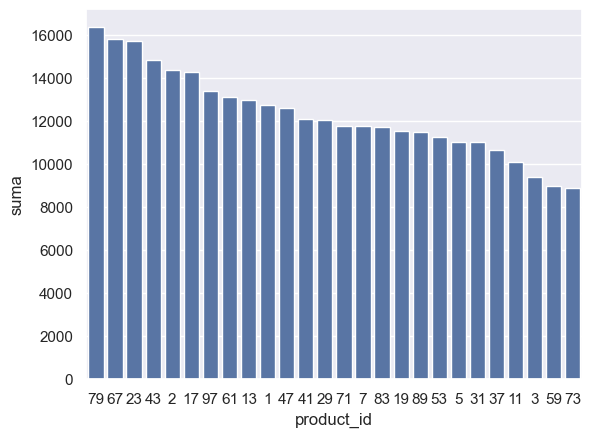

In [58]:
query="""
SELECT product_id, sum(amount) as suma
FROM transactions_products
JOIN transaction on id = transaction_id 
WHERE declined=0
GROUP BY product_id
"""

seab.set_theme()
df = pd.read_sql(query, conn)
order = df.sort_values(by='suma', ascending=False)['product_id']
seab.barplot(data=df, x='product_id',y='suma',order=order) 

#plt.figure(figsize=(10,6))
#plt.bar(df['business_id'].astype(str), df['total_monto'], color='magenta')
#plt.title('Monto total por Business ID')
#plt.xlabel('Business ID')
#plt.ylabel('Monto total')
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()

- Exercici 3 - Una variable categòrica.

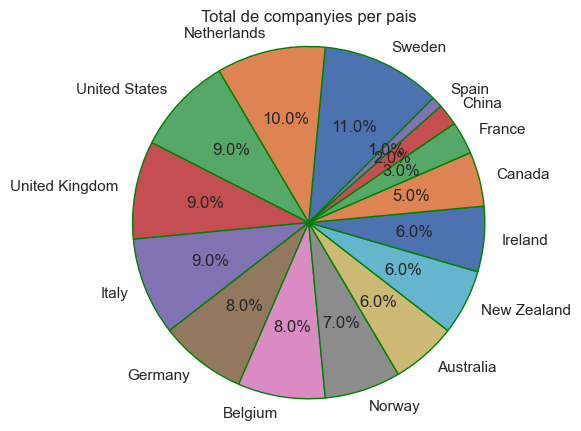

In [57]:
query = """
SELECT country , count(country) AS cantPais
FROM companies
GROUP BY country
"""

cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
rows = cursor.fetchall()
df = pd.DataFrame(rows, columns=column_names)
df_top = df.sort_values(by='cantPais', ascending=False)

plt.figure(figsize=(5,5))
plt.pie(
    df_top['cantPais'], 
    labels=df_top['country'].astype(str), 
    autopct='%1.1f%%', 
    startangle=45,
    wedgeprops={'edgecolor': 'green'}
)
plt.title('Total de companyies per pais')
plt.axis('equal')  # Para que el círculo quede perfecto
plt.show()

- Exercici 4 - Una variable categòrica i una numèrica.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_12108\3654969262.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


<Axes: xlabel='company_id', ylabel='suma'>

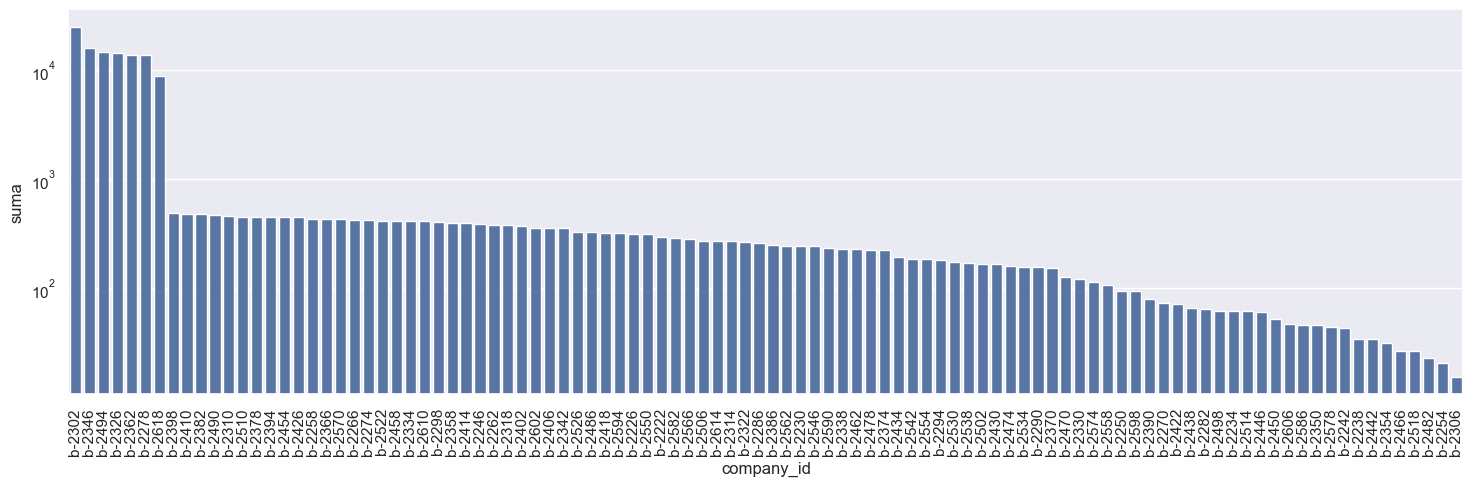

In [ ]:
query="""
SELECT company_id, sum(amount) as suma
FROM companies
JOIN transaction on company_id = business_id 
WHERE declined=0
GROUP BY company_id
"""
plt.figure(figsize=(18,5))
seab.set_theme()
df = pd.read_sql(query, conn)
order = df.sort_values(by='suma', ascending=False)['company_id']
plt.yscale("log")
plt.xticks(rotation=90) 
seab.barplot(data=df, x='company_id',y='suma',order=order) 

- Exercici 5 - Dues variables categòriques.

- Exercici 6 - Tres variables.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_12108\1042579652.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Text(0.5, 33.078125000000014, 'Pais')

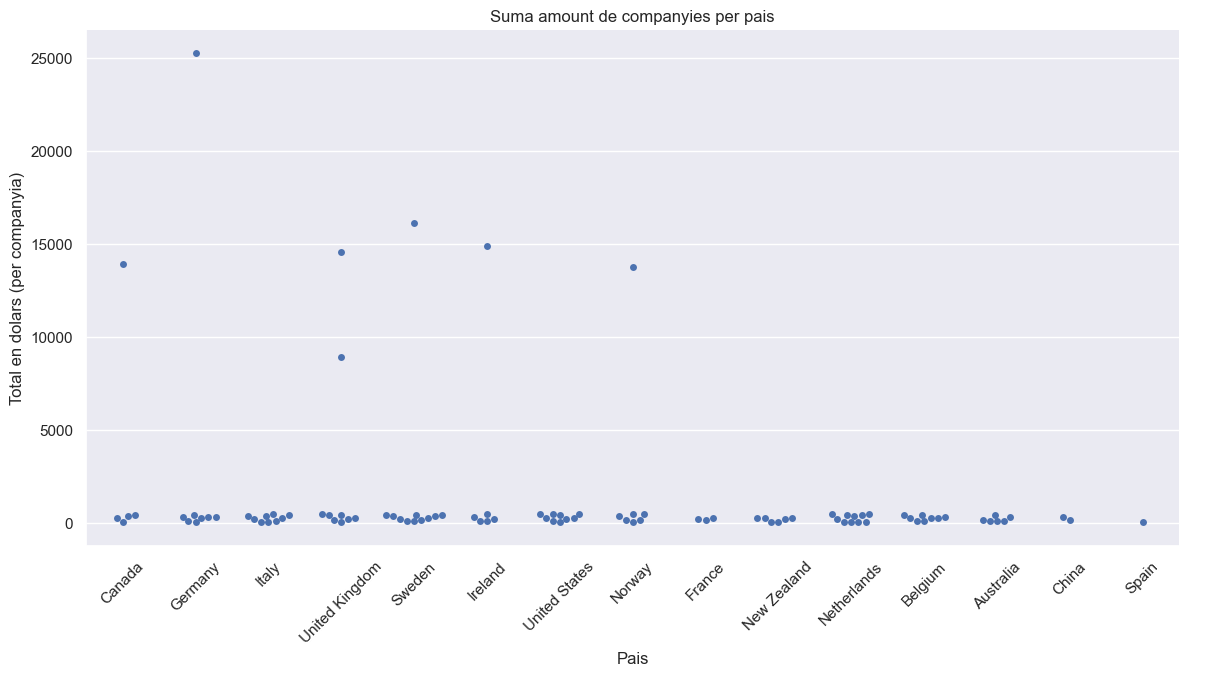

In [102]:
query="""
SELECT company_id, country, sum(amount) as suma
FROM companies
JOIN transaction on company_id = business_id 
WHERE declined=0
GROUP BY company_id, country
"""
seab.set_theme()
df = pd.read_sql(query, conn)

g=seab.catplot(data=df, x="country", y="suma", kind="swarm",height=6, aspect=2)
g.set_xticklabels(rotation=45)
plt.title('Suma amount de companyies per pais')
plt.ylabel("Total en dolars (per companyia)")
plt.xlabel("Pais")

- Exercici 7 - Graficar un Pairplot.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_12108\505821129.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
c:\Users\xXSrBiscuitXx\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


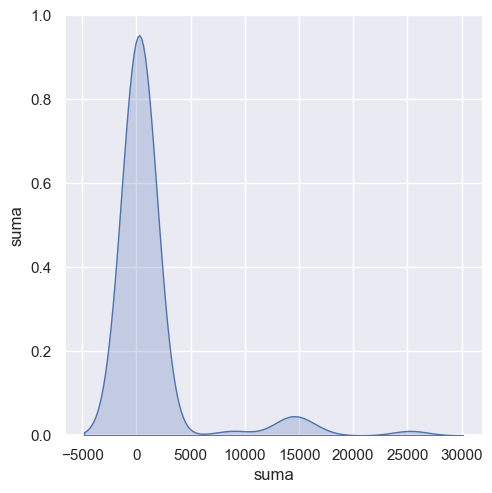

In [124]:
query="""
SELECT company_id, country, sum(amount) as suma
FROM companies
JOIN transaction on company_id = business_id 
WHERE declined=0
GROUP BY company_id, country
"""
seab.set_theme()
df = pd.read_sql(query, conn)

g=seab.pairplot(df,size=5,kind="kde")